In [26]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.seasonal as smt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime as dt
from sklearn import linear_model 
import plotly
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [3]:
df=pd.read_csv('prices.csv')

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
dfg=df[df['symbol']=='NKE']

In [6]:
dfg.head()

,date,symbol,open,close,low,high,volume
558,2010-01-04,NKE,66.059998,65.349998,65.120003,66.070000,11972400.0
1026,2010-01-05,NKE,65.139999,65.610001,64.699997,65.790001,6275200.0
1494,2010-01-06,NKE,65.400002,65.209999,64.940002,65.690002,13399200.0
1962,2010-01-07,NKE,65.120003,65.849998,65.050003,66.000000,7187600.0
2430,2010-01-08,NKE,65.790001,65.720001,64.940002,65.849998,7249600.0


In [7]:
len(dfg)

1762

In [8]:
dfg=dfg.reset_index()

In [9]:
data=[]
data.append(dfg)

In [10]:
dfg['date'] = pd.to_datetime(dfg['date'])

In [11]:
traces=[]
for dfg in data:
    
    trace = plotly.graph_objs.Scattergl(
        x=dfg['date'],
        y=dfg['close']
    )
    traces.append(trace)
    
layout = plotly.graph_objs.Layout(title='Nike Stock History')

fig = plotly.graph_objs.Figure(data=traces, layout=layout)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='dataplot')
    

# LSTM

In [12]:
df=data[0]

splitdate='2015-12-01'

train, test = df[df['date'] < splitdate], df[df['date'] >= splitdate]
train = train.drop(['date','symbol'], axis=1)
test = test.drop(['date','symbol'], axis=1)

In [13]:
len(train)

1488

In [14]:
len(test)

274

In [17]:
leng = 10
LSTM_traininput = []
for i in range(len(train)-leng):
    temp = train[i:(i+leng)].copy()
    
    for col in list(temp):
        temp[col] = temp[col]/temp[col].iloc[0] - 1
    
    LSTM_traininput.append(temp)

In [18]:
LSTM_trainoutput = (train['close'][leng:].values/train['close'][:-leng].values)-1

In [19]:
print(LSTM_traininput[0])
print(LSTM_trainoutput[0])

      index      open     close       low      high    volume
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.838710 -0.013927  0.003979 -0.006450 -0.004238 -0.475861
2  1.677419 -0.009991 -0.002142 -0.002764 -0.005751  0.119174
3  2.516129 -0.014229  0.007651 -0.001075 -0.001059 -0.399653
4  3.354839 -0.004087  0.005662 -0.002764 -0.003330 -0.394474
5  4.193548 -0.002119 -0.006733 -0.007217 -0.002119 -0.108115
6  5.032258 -0.022101 -0.008110 -0.012899 -0.014681 -0.040660
7  5.870968 -0.014381  0.000765 -0.005221 -0.006054 -0.528181
8  6.709677 -0.008629 -0.005509 -0.005682 -0.003632 -0.389295
9  7.548387 -0.019376 -0.014690 -0.017967 -0.016044 -0.056730
-0.00979340504341


In [20]:
LSTM_testinput = []
for i in range(len(test)-leng):
    temp = test[i:(i+leng)].copy()
    
    for col in list(temp):
        temp[col] = temp[col]/temp[col].iloc[0] - 1
    
    LSTM_testinput.append(temp)

In [21]:
LSTM_testoutput = (test['close'][leng:].values/test['close'][:-leng].values)-1

In [22]:
print(LSTM_testinput[0])
print(LSTM_testoutput[0])

         index      open     close       low      high    volume
1488  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1489  0.000698  0.005525 -0.004951  0.001365 -0.001499  0.161674
1490  0.001396  0.007493 -0.031431 -0.022135 -0.000450  0.553128
1491  0.002094 -0.017560 -0.007351 -0.016070 -0.003748  0.080706
1492  0.002793  0.004768 -0.012827 -0.009930 -0.003897 -0.097273
1493  0.003491 -0.009461 -0.012077 -0.011295 -0.005097 -0.182470
1494  0.004189 -0.010294 -0.033531 -0.031686 -0.014091  0.085431
1495  0.004887 -0.025734 -0.035031 -0.029639 -0.028332 -0.176345
1496  0.005585 -0.034060 -0.052659 -0.047377 -0.042572  0.206942
1497  0.006283 -0.041553 -0.040882 -0.043966 -0.038150  0.165437
-0.0352561478547


In [23]:
LSTM_traininput = [np.array(LSTM_trainin) for LSTM_trainin in LSTM_traininput]
LSTM_traininput = np.array(LSTM_traininput)

LSTM_testinput = [np.array(LSTM_testin) for LSTM_testin in LSTM_testinput]
LSTM_testinput = np.array(LSTM_testinput)

In [24]:
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [27]:
# random seed for reproducibility
np.random.seed(202)
# initialise model architecture
nn_model = build_model(LSTM_traininput, output_size=1, neurons = 10)
# model output is next price normalised to 10th previous closing price
# train model on data
# note: eth_history contains information on the training error per epoch
nn_history = nn_model.fit(LSTM_traininput, LSTM_trainoutput, 
                            epochs=10, batch_size=1, verbose=2, shuffle=True)

Epoch 1/10
 - 20s - loss: 0.0360
Epoch 2/10
 - 17s - loss: 0.0188
Epoch 3/10
 - 16s - loss: 0.0165
Epoch 4/10
 - 16s - loss: 0.0150
Epoch 5/10
 - 19s - loss: 0.0148
Epoch 6/10
 - 20s - loss: 0.0145
Epoch 7/10
 - 20s - loss: 0.0144
Epoch 8/10
 - 18s - loss: 0.0138
Epoch 9/10
 - 19s - loss: 0.0137
Epoch 10/10
 - 18s - loss: 0.0135


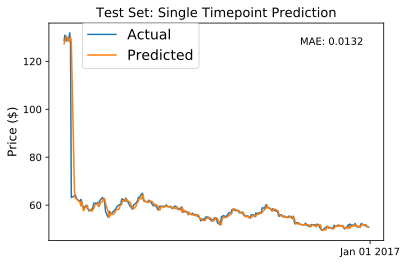

In [30]:
import datetime
%config InlineBackend.figure_format = 'svg'
model_data = dfg

fig, ax1 = plt.subplots(1,1)
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['date']>= splitdate]['date'][leng:].astype(datetime.datetime),
         test['close'][leng:], label='Actual')
ax1.plot(model_data[model_data['date']>= splitdate]['date'][leng:].astype(datetime.datetime),
         ((np.transpose(nn_model.predict(LSTM_testinput))+1) * test['close'].values[:-leng])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(nn_model.predict(LSTM_testinput))+1)-(test['close'].values[leng:])/(test['close'].values[:-leng]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()